### Introduction

In this notebook I explore the larger of the two GZTAN dataset. This one possesses 9990 observations compared to the other that has 1000 observations. The smaller set is derived from the 2002 work of Tzanetakis and Cook in which the dataset they used  contained 1000 observations and 30 features. (Ramirez and Flores, 2019) The number of features of the original dataset was subsequently extended to include 60 features, and the larger set developed to embrace almost ten times more observations and the 60 features. 

The algorithms used for modeling are: RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, KNeighborsClassifier, and MLPClassifier which are all available through the SciKit Learn library. These classification algorithms are used in their default state with out any additional fine tuning.

The results of this exploration shows that each of the model examined achieved greater than 80% accuracy with KNeighbors attaining 93% accuracy, ExtraTrees 88%, and RandomForest 86%.

It should be noted that LInearSVC,  which was also used, obtained a accuracy score of 70%.

In [56]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score, ConfusionMatrixDisplay, recall_score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,0.072885,0.000661,-0.000034,0.002113,-0.000020,0.000146,123.046875,-224.972168,2012.923584,141.034027,516.071289,-31.418577,183.526886,44.239845,87.187004,-7.560237,113.792641,23.984304,40.124763,-4.667820,52.830784,16.754074,54.547379,-15.778140,35.361969,21.247795,30.610723,-2.748509,30.471853,9.496511,46.488537,-16.715929,51.195080,8.380793,30.274279,-2.225949,80.351776,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,0.089111,0.000987,-0.000027,0.002897,-0.000045,0.000145,83.354335,-192.806641,885.160339,118.249252,545.983276,-36.626003,140.996994,47.933037,186.287338,-6.903654,76.394951,26.585802,88.797173,-8.740885,71.156433,10.913206,61.830791,-17.822914,41.004284,23.483845,92.437691,-4.919242,33.177044,11.510695,40.045124,-19.505360,39.993141,2.598546,45.540180,-8.003813,34.249245,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,0.072194,0.003784,0.000015,0.002455,-0.000029,0.000356,123.046875,-287.840088,18053.564453,131.430176,990.859253,-11.647097,1331.622681,55.451031,183.539337,11.773556,201.108780,24.390709,172.583389,-6.812969,121.175438,11.158732,132.398453,-11.628373,38.258247,7.262672,68.381416,-1.402563,91.842232,6.899863,33.722115,-13.186050,28.824409,-3.914767,98.936378,-9.124884,44.127342,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,0.104072,0.001951,0.000004,0.003681,-0.000048,0.000311,123.046875,-162.659592,3131.105469,105.525452,340.165039,-36.225224,187.097839,63.086830,110.704758,-14.349810,65.637077,31.208384,52.937691,-16.295706,68.101440,18.583887,110.503654,-19.150936,27.294020,16.491760,32.721035,-8.492604,28.602901,12.855068,24.554409,-14.699870,18.588800,4.112486,18.905340,-5.266814,20.634571,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock
9989,rock.00099.9.wav,66149,0.369293,0.086759,0.050524,0.000067,1634.330126,411429.169769,1867.422378,119722.211518,3462.042142,1.517016e+06,0.068495,0.001388,-0.000032,0.002151,0.000014,0.000165,234.907670,-236.018494,1983.238525,125.729851,1026.560547,-17.066608,220.924911,62.751545,138.793884,-7.210380,59.799850,12.051001,144.436005,-9.803603,87.197350,11.539696,49.170475,-14.211831,47.710716,19.525213,89.985863,-2.227311,54.529694,18.518749,36.854664,-13.869130,43.309685,9.048212,34.981422,-7.005269,28.990051,1.342274,38.801735,-11.598399,58.983097,-0.178517,55.761299,-6.903252,39.485901,-3.412534,31.727489,rock


In [4]:
df.shape

(9990, 60)

In [5]:
df.drop_duplicates().shape

(9990, 60)

-- the dataset contains no duplicates. 

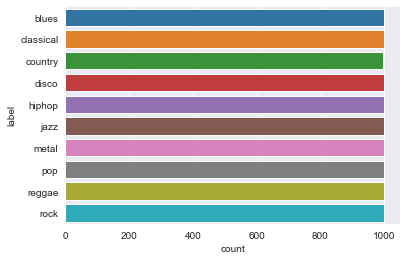

In [6]:
sns.countplot(y='label', data=df)
plt.show()

In [7]:
df.corr()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chroma_stft_mean,NaN,1.000000,-0.443757,0.424706,0.243647,0.534670,0.251985,0.464617,0.100909,0.526881,0.138394,0.457080,0.278017,0.034305,0.216488,-0.109303,0.417177,0.019084,0.573974,0.054769,-0.513978,0.055816,0.013981,0.121196,0.213522,0.135822,0.069027,0.090913,0.342903,0.121105,0.112848,0.101439,0.423220,0.032791,0.155357,-0.016019,0.376734,-0.067534,0.108459,-0.147130,0.400529,-0.226017,-0.036171,-0.242423,0.297993,-0.265843,-0.078784,-0.270092,0.228293,-0.264815,-0.103968,-0.273841,0.168254,-0.308342,-0.062985,-0.313233,0.193666,-0.363354
chroma_stft_var,NaN,-0.443757,1.000000,-0.078410,0.251900,-0.208136,0.276964,-0.031197,0.291007,-0.141792,0.330930,-0.391281,0.138214,-0.010949,0.024139,0.072719,0.000478,-0.004419,-0.296517,0.347460,0.091757,0.326217,0.323529,0.354501,-0.194552,0.333186,0.248247,0.351826,-0.155817,0.363150,0.192922,0.343599,-0.239743,0.352686,0.126653,0.363827,-0.216207,0.337400,0.149261,0.335556,-0.263772,0.302924,0.209318,0.309993,-0.197412,0.283260,0.162830,0.285569,-0.221620,0.296099,0.111544,0.303262,-0.171744,0.295359,0.107008,0.277295,-0.173398,0.287195
rms_mean,NaN,0.424706,-0.078410,1.000000,0.553770,0.470781,0.241796,0.495142,0.085760,0.500178,0.157281,0.293745,0.217606,0.065134,0.884846,-0.012401,0.766446,0.015668,0.795000,-0.080320,-0.453606,0.033635,0.136936,0.069158,-0.034473,0.178296,0.122941,0.119419,0.072916,0.212010,0.181207,0.140892,0.134868,0.126329,0.213195,0.087181,0.144650,0.070977,0.133593,-0.012006,0.134779,-0.064247,0.043769,-0.088406,0.113960,-0.080352,0.012184,-0.088842,0.055563,-0.032953,-0.013952,-0.041470,0.087615,-0.046180,0.024552,-0.062662,0.082251,-0.103519
rms_var,NaN,0.243647,0.251900,0.553770,1.000000,0.327809,0.509235,0.383329,0.285950,0.350716,0.377474,0.143768,0.453957,0.071193,0.519717,0.100449,0.744850,-0.020418,0.296198,0.336492,-0.351508,0.355515,0.277005,0.376544,-0.215820,0.412464,0.248711,0.359285,-0.134974,0.479166,0.290245,0.356301,-0.110396,0.381793,0.301416,0.332587,-0.058046,0.297938,0.251421,0.227644,-0.066374,0.164785,0.214514,0.161973,-0.026530,0.130442,0.189566,0.116201,-0.064570,0.159390,0.144238,0.144163,-0.004785,0.102019,0.136798,0.095054,0.015085,0.073571
spectral_centroid_mean,NaN,0.534670,-0.208136,0.470781,0.327809,1.000000,0.476959,0.890382,0.021120,0.974360,0.172380,0.865487,0.579997,0.050559,0.274194,-0.004654,0.531487,0.002111,0.686196,-0.061331,-0.931435,0.085022,0.195977,0.042125,-0.165793,0.187926,0.078506,0.027291,-0.027122,0.209412,0.196388,0.106182,0.088172,0.118458,0.260035,0.057883,0.146238,0.054746,0.144027,-0.009416,0.118541,-0.064614,0.058537,-0.055983,0.118186,-0.058378,0.035098,-0.064673,0.116866,-0.025006,0.026879,-0.018358,0.177934,-0.006376,0.018651,-0.011018,0.191512,-0.051205
spectral_centroid_var,NaN,0.251985,0.276964,0.241796,0.509235,0.476959,1.000000,0.556491,0.614254,0.492965,0.780308,0.242913,0.818348,0.047028,0.192711,0.089544,0.388760,-0.009407,0.159586,0.429485,-0.497158,0.748612,0.513633,0.461658,-0.297699,0.488902,0.406538,0.390078,-0.158945,0.493938,0.391931,0.

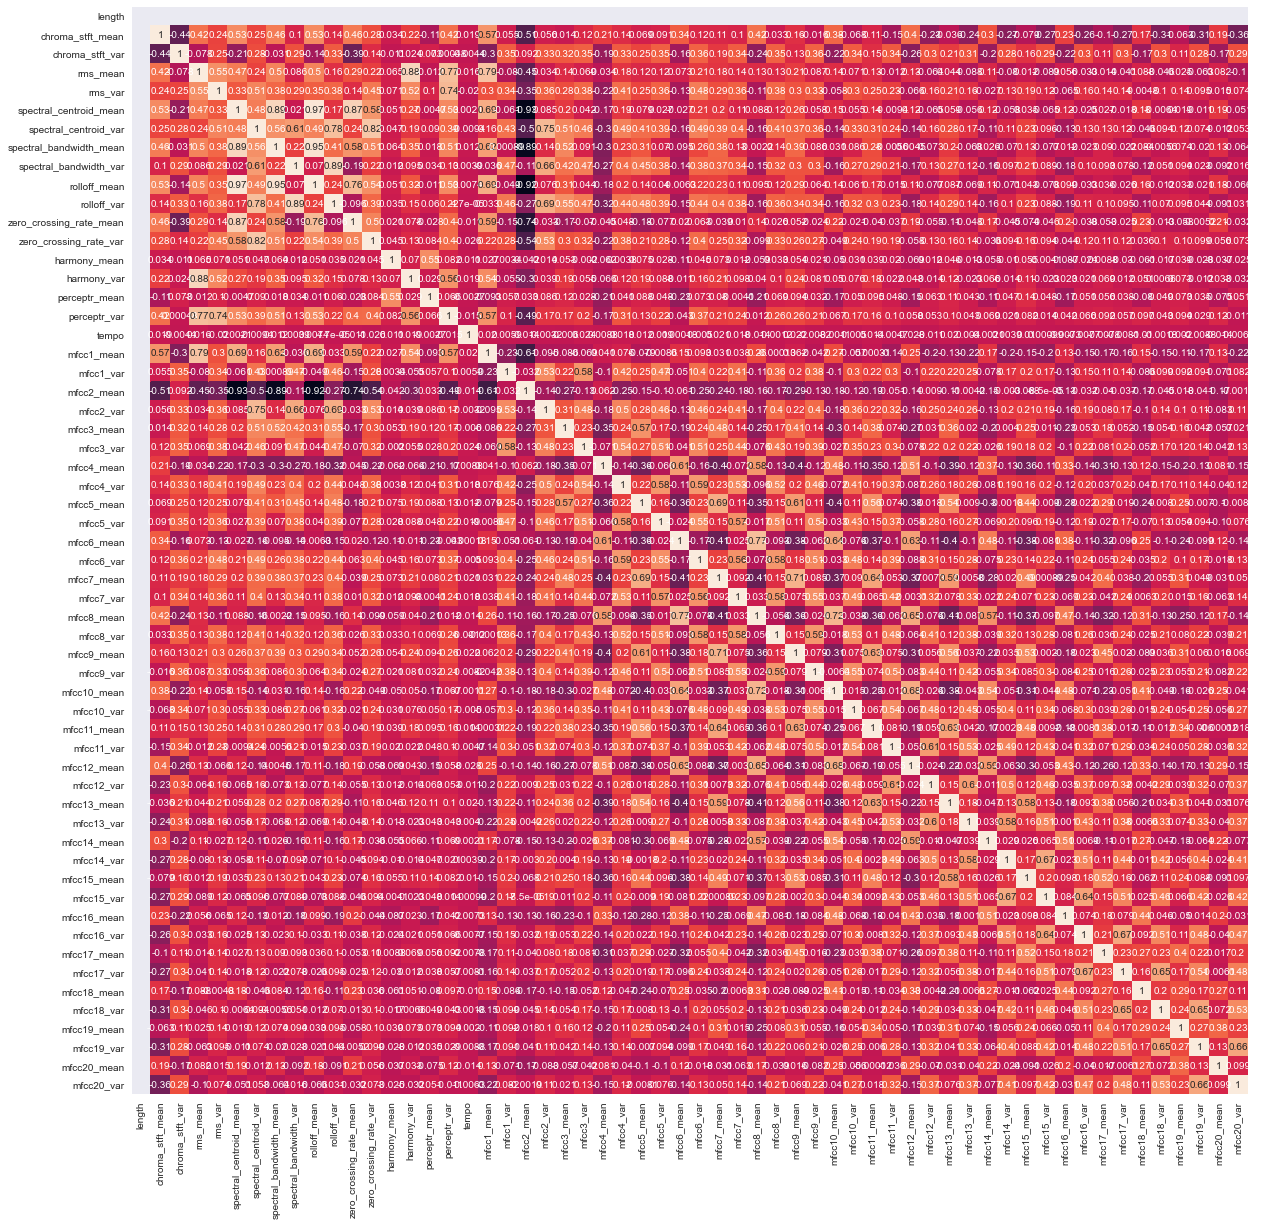

In [8]:
plt.figure(figsize=(20,20))
data_corr = sns.heatmap(df.corr(), cbar= False, annot=True, )
plt.show()

#### Drop unnecessary features

In [9]:
# Drop 'filename' and 'length'
abt = df.drop(['filename', 'length'], axis=1)
abt.shape

(9990, 58)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Splitting data

In [10]:
X = abt.drop(['label'], axis=1)
y = abt.label

In [11]:
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Create pipeline and fit model

#### RandomForest

In [52]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123))

In [53]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=123))])

In [54]:
pipeline.score(X_test, y_test)

0.8608608608608609

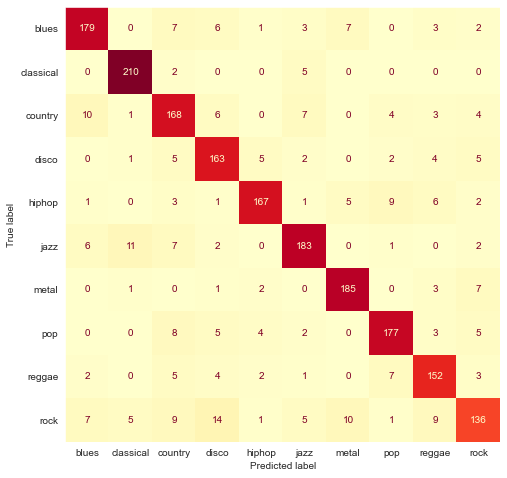

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(pipeline, X_test, y_test, ax=ax, cmap='YlOrRd', colorbar=False)
plt.grid(False)
plt.show()

#### ExtraTrees

In [27]:
pipeline2 = make_pipeline(StandardScaler(), ExtraTreesClassifier(random_state=123))

In [28]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier',
                 ExtraTreesClassifier(random_state=123))])

In [29]:
pipeline2.score(X_test, y_test)

0.8833833833833834

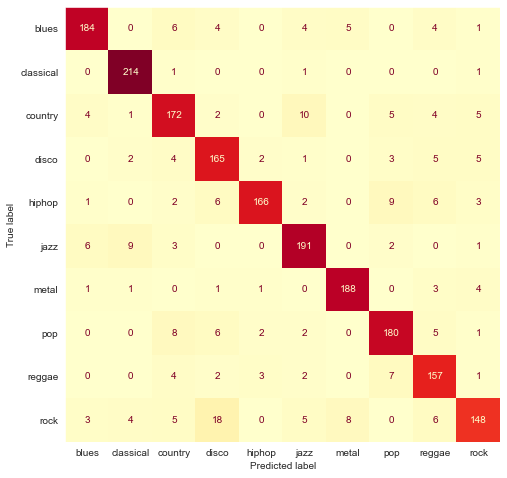

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(pipeline2, X_test, y_test, ax=ax, cmap='YlOrRd', colorbar=False)
plt.grid(False)
plt.show()

#### KNeighbors

In [32]:
pipeline3 = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(random_state=123), KNeighborsClassifier())

In [35]:
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('neighborhoodcomponentsanalysis',
                 NeighborhoodComponentsAnalysis(random_state=123)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [34]:
pipeline3.score(X_test, y_test)

0.9304304304304304

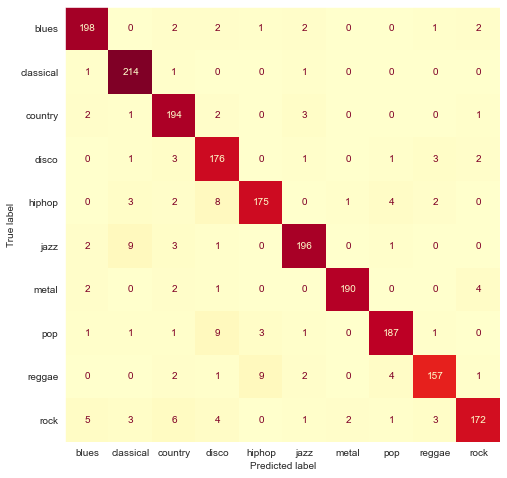

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(pipeline3, X_test, y_test, ax=ax, cmap='YlOrRd', colorbar=False)
plt.grid(False)
plt.show()

#### LinearSVC

In [36]:
pipe4 = make_pipeline(StandardScaler(), LinearSVC(random_state=123))

In [37]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=123))])

In [38]:
pipe4.score(X_test, y_test)

0.7012012012012012

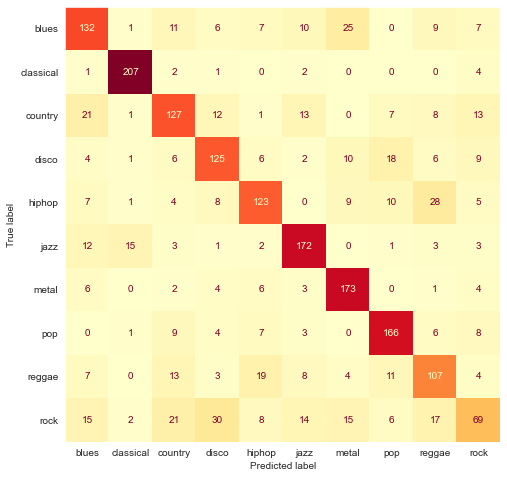

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(pipe4, X_test, y_test, ax=ax, cmap='YlOrRd', colorbar=False)
plt.grid(False)
plt.show()

#### MLPClassifier

In [39]:
pipe5 = make_pipeline(StandardScaler(), MLPClassifier(random_state=123))

In [40]:
pipe5.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(random_state=123))])

In [41]:
pipe5.score(X_test, y_test)

0.8683683683683684

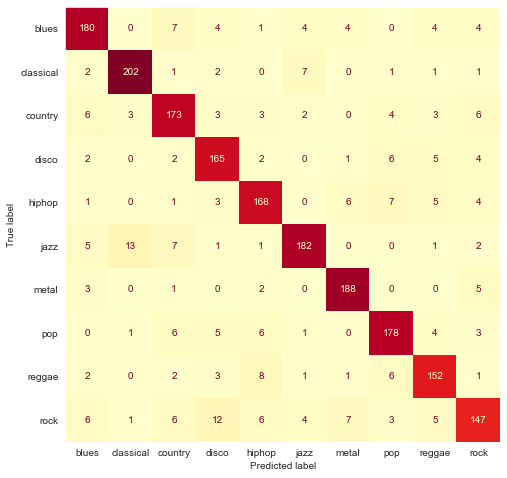

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(pipe5, X_test, y_test, ax=ax, cmap='YlOrRd', colorbar=False)
plt.grid(False)
plt.show()

#### Gradient Boost

In [59]:
pipe6 = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))

In [60]:
pipe6.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=123))])

In [61]:
pipe6.score(X_test, y_test)

0.8253253253253253

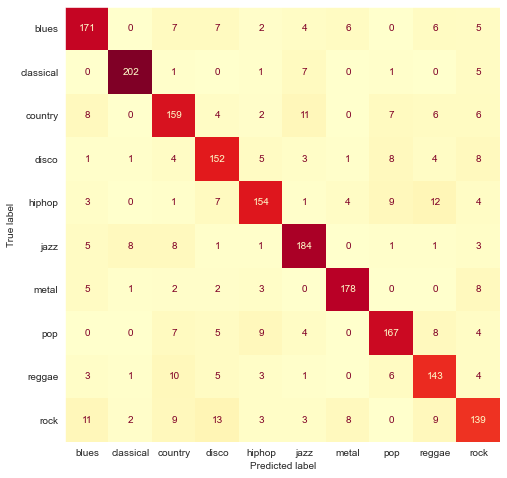

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(pipe6, X_test, y_test, ax=ax, cmap='YlOrRd', colorbar=False)
plt.grid(False)
plt.show()

###  Results
 - KNeighborsClassifier model performed the best with 93% accuracy; ExtraTrees 88%, RandomForest 86%; MLPClassifier 85%.